In [31]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist = fetch_openml('mnist_784', version=1)

In [5]:
# Le dataset principal qui contient toutes les images
print (mnist.data.shape)

# Le vecteur d'annotations associé au dataset (nombre entre 0 et 9)
print (mnist.target.shape)

(70000, 784)
(70000,)


In [35]:
sample = np.random.randint(70000, size=10000)
data = mnist.data.values[sample]
target = mnist.target.values[sample]

In [37]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

In [106]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [22]:
knn.predict([xtest[4]])

array(['2'], dtype=object)

In [23]:
ytest[4]

'2'

In [28]:
knn.score(xtest, ytest)

0.922

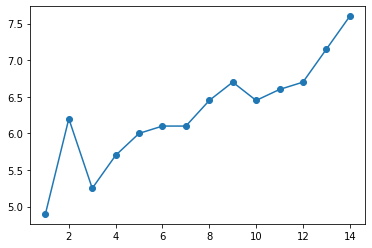

In [39]:
errors = []
for k in range(1,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(1,15), errors, 'o-')
plt.show()

In [107]:
from PIL import Image

an_image = Image.open("test/paint_2.jpg")

image_sequence = an_image.getdata()
image_array = np.array(image_sequence)


image = []
for element in image_array:
    total = 0
    for value in element:
        total+=value
    image.append(255 - round(total/3))

image = np.array(image)

knn.predict([image])

array(['5'], dtype=object)